## DOE HW1

2018.3.7  
統碩一 賴東昇 106354002

## In class example
    

In [466]:
import re
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import itertools
from math import *
%matplotlib inline  

### Data processing 

In [2]:
data = '''
1 4.90 3.87 11 4.70 4.25 21 5.06 5.54
2 4.50 4.54 12 4.77 5.57 22 4.44 5.52
3 4.86 4.60 13 4.75 4.36 23 4.46 5.03
4 5.57 5.27 14 4.60 4.35 24 5.43 4.33
5 4.62 5.59 15 5.06 4.88 25 4.83 4.56
6 4.65 4.61 16 5.51 4.56 26 5.05 5.50
7 4.62 5.19 17 4.66 4.84 27 5.78 5.16
8 6.39 4.64 18 4.95 4.24 28 5.10 4.89
9 4.36 4.35 19 4.75 4.33 29 4.68 4.89
10 4.91 4.49 20 4.67 4.24 30 6.06 5.24
'''

In [179]:
data_sp = data.rsplit()
s = data_sp[1::9]+data_sp[4::9]+data_sp[7::9]
e = data_sp[2::9]+data_sp[5::9]+data_sp[8::9]
# str to float
s = list(map(float,s))
e = list(map(float,e))
df = pd.DataFrame({'s':s,'e':e})
df= df.iloc[:,[1,0]]
df['diff'] = df['s']-df['e']
df.head()

,s,e,diff
0,4.90,3.87,1.03
1,4.50,4.54,-0.04
2,4.86,4.60,0.26
3,5.57,5.27,0.30
4,4.62,5.59,-0.97


### Pair T-test

In [255]:
ss.ttest_rel(df['s'],df['e'])

Ttest_relResult(statistic=1.4900472574494388, pvalue=0.14700874778391104)

### Permutation test

The function permutation is used to conduct two-sided permutation test.  
Argument permu_time decides permutation times, key pass the function to calculate test statistic,e.g, mean and sum.



In [397]:
def permutation(data,permu_time,key):
    n = len(data)
    obs_ts = key(data)
    data = list(map(abs,data))
    res = np.array([])
    for i in range(permu_time):
        permu = (data*np.array([1 if i else -1 for i in  np.random.randint(0,2,n)]))
        res = np.append(res,key(permu))
    return((abs(res)>abs(obs_ts)).mean())

or find the exact $2^n$ permutation

In [482]:
def exact_permutation(data,key):
    n = len(data)
    obs_ts = key(data)
    data = list(map(abs,data))
    res = np.array([])
    exact = list( map(list,list(itertools.product([0, 1], repeat=len(data)))))
    for i in range(len(exact)):
        permu = (data*np.array([1 if j else -1 for j in exact[i] ]))
        res = np.append(res,key(permu))
    return((abs(res)>abs(obs_ts)).mean())

In [484]:
exact_permutation(list(df['diff'])[-10:],key=lambda x : sum(x)/len(x))

0.908203125

#### test statistic: $\bar{x}$

In [398]:
np.random.seed(689)
p_value = permutation(list(df['diff']),100000,key= lambda x: sum(x)/len(x))
print("p.value is {:.3f}".format(p_value))

p.value is 0.146


#### test statistic: $\Sigma{x_i}$

In [399]:
np.random.seed(689)
permutation(list(df['diff']),100000,key= lambda x: sum(x)/len(x))
print("p.value is {:.3f}".format(p_value))

p.value is 0.146


### Wilcoxon Signed-Rank test
one can also use wilcoxon sign-rank test to test if median of pair samples are the same.

In [400]:
def absrank(data):   
    sgn = [1 if i>0 else -1 for i in data]
    data = ss.rankdata(abs(data))    
    return(data*sgn)

def wilcoxon(data,permu_time):
    if not isinstance(data,np.ndarray):
        if not isinstance(data,list):
            return("Error in wilcoxon()! data should be array or list")
        data = np.array(data)     
    rankdata = absrank(data)
    obs = sum(rankdata>0)
    res = np.array([])
    for i in range(permu_time):
        permu = sum(rankdata*np.array([1 if i else -1 for i in  np.random.randint(0,2,len(data))])>0)
        res = np.append(res,permu)
    return((res>obs).mean())
    
p_value = wilcoxon(list(df['diff']),100000)    
print("p.value is {:.3f}".format(p_value))

p.value is 0.021


## Exercise 2.3

1. Let them choose:   
    there's no 'randomize' in this method,and probably no one would choose diet A.
    
2. Take the first 10 for A, the second 10 for B:  
    By using this method, we can get balanced sample with 10 unit assigned to diet A,others to diet B. However, this method may cause other systematic error.For example, the numbering of children may have some meaning. It may be orderd by district, gender, score, height or others, which can result in systematic error.
3. Alternate A,B,A,B:   
    similar to 2. , we can get balanced sample easily but we can't avoid some systematic error cause by numbering.

4. Toss a coin for each child in the study:  
   It's so called "physical randomization". If the coin is fair, we can get a randomized sample,cutting the sysmatic error. However, the coin is, usually, not fair. Even if it's fair, we may get a unbalanced sample. Chance are that we may get most units with one treatment, only few units assigned to the other.

5. Get 20 childeren; choose 10 at random for A, the rest for B:  
    不清楚題幹的random是什麼意思，若是由研究人員進行隨機指派，則仍會受研究人員之主觀判斷影響。

## Exercise 2.4

<table>
  <tr>
    <th>Reduced pH </th>
    <th>Neutral pH</th> 
  </tr>
  <tr>
    <td>256,159,149 </td>
    <td>54,123,248</td> 
  </tr>
</table>

In this exercise, we use both t-test and permutation test to test $H_0: $ two treatments
have equal average numbers of Copepoda with $\alpha=0.05$

### two sample T-test (equal variance)

In [381]:
ss.ttest_ind([256,159,149],[54,123,248])

Ttest_indResult(statistic=0.69947344809037548, pvalue=0.52279605246468153)

### permutation test with test statistic:  $\bar{x} - \bar{y}$

In [386]:
def two_sample_permutation(data1,data2,permu_time,key):
    n = [len(data1),len(data2)]
    obs_ts = key(data1,data2)
    data = data1+data2
    res = np.array([])
    for i in range(permu_time):
        random.shuffle(data)
        #data1 = data[:n[0]]
        #data2 = data[n[1]:]
        res = np.append(res,key(data[:n[0]],data[n[1]:]))
    return((res>obs_ts).mean())

p_value = two_sample_permutation([256,159,149],[54,123,248],10000,key=lambda x,y: abs(sum(x)/3-sum(y)/3))
print("p.value is {:.3f}".format(p_value))


p.value is 0.307


Both two test reject $H_0$

## Exercise 2.5
Sse permutation test to test $H_0:$ treatment have no effect. Set $\alpha=0.05$
### permutation test with test statistic $\bar{x}$

In [401]:
p_value = permutation([15.3,-31.8,-35.6,-14.5,3.1,-24.5],10000,key =lambda x: sum(x)/len(x))
print("p_value is {:.3f}".format(p_value))

p_value is 0.163


### one sample T test

In [396]:
ss.ttest_1samp([15.3,-31.8,-35.6,-14.5,3.1,-24.5],0)

Ttest_1sampResult(statistic=-1.7776653282680051, pvalue=0.13560206891207874)

Both two test reject $H_0$

## Problem 2.1
To test if ratio equals to one (No significant difference), we randomly select units to create reciprocal, and count the ratio sum as test statistic.

In [427]:
def ratio_permutation(data,permu_time,key):
    n = len(data)
    obs_ts = key(data)
    res = np.array([])
    data =  [(i,1/i) for i in test]
    for i in range(permu_time):
        sel = np.random.randint(0,2,n)
        permu = [data[i][sel[i]] for i in range(len(test))]
        res = np.append(res,key(permu))
    return([res,(res>obs_ts).mean()])


p.value is 0.50


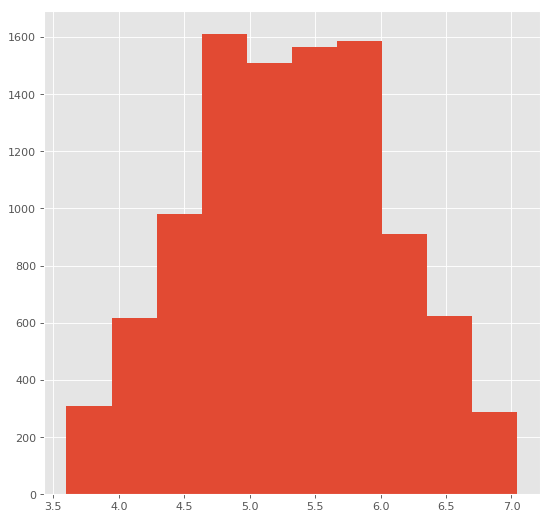

In [449]:
res = ratio_permutation([0.950, 0.978, 0.762, 0.733,0.823,1.011],10000,key=lambda x:sum(x))
print("p.value is {:.2f}".format(res[1])) 
plt.style.use('ggplot')
fig=plt.figure(figsize=(8, 8), dpi= 80)
_=plt.hist(res[0])